<a href="https://colab.research.google.com/github/Subhakshan-Chakraborty/Loan-Eligibility-Prediction/blob/main/Loan_Eligibility_Prediction(Dummy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

These lines import necessary libraries for data analysis and visualization:

- pandas for data manipulation and analysis.
- numpy for numerical operations.
- matplotlib.pyplot for basic plotting.
- seaborn for statistical data visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("LoanApprovalPrediction.csv")
data.head(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


This line reads a CSV file named "LoanApprovalPrediction.csv" and loads it into a pandas DataFrame named data.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


data.head(5)

#Data Processing and Visualization

This code identifies categorical variables (columns with object data type) in the DataFrame and prints the number of such variables.

In [3]:
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


As Loan_ID is completely unique and not correlated with any of the other column, So we will drop it using .drop() function.

In [4]:
data.drop(['Loan_ID'],axis=1,inplace=True)

This code visualizes the distribution of unique values for each categorical column using bar plots.

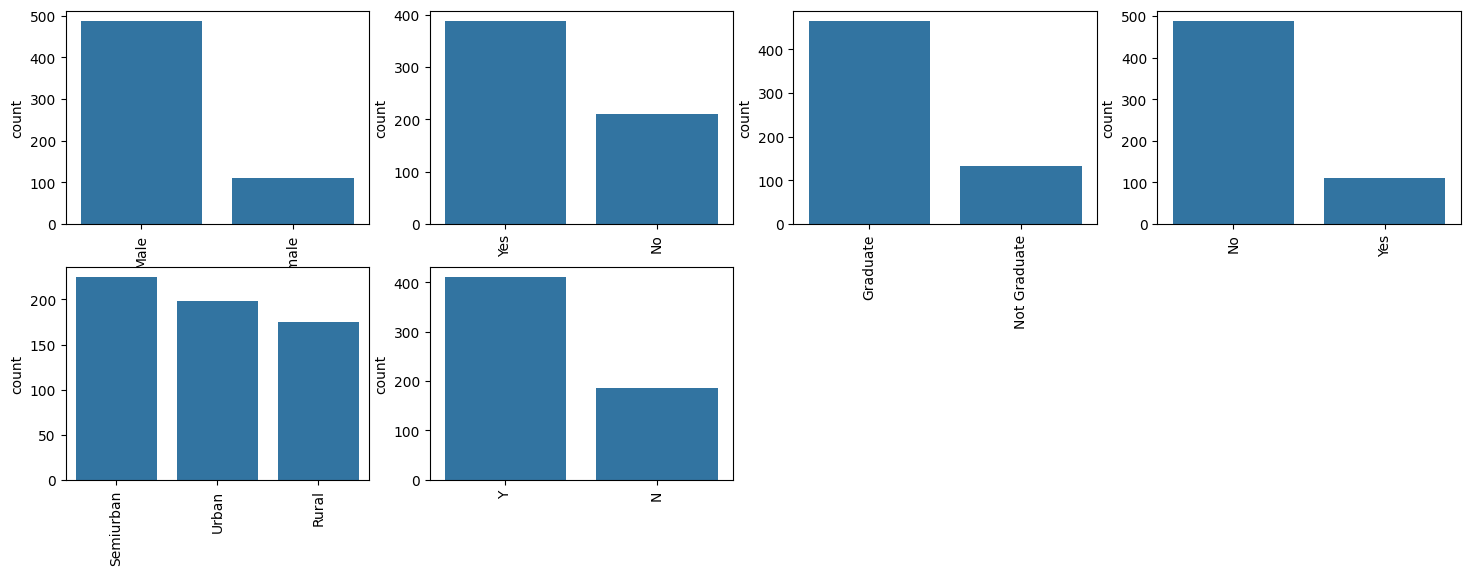

In [5]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

##As all the categorical values are binary so we can use Label Encoder for all such columns and the values will change into int datatype

In [6]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = label_encoder.fit_transform(data[col])

This code uses LabelEncoder from scikit-learn to convert categorical values into numerical representations (0s and 1s).

In [7]:
# To find the number of columns with
# datatype==object
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


###---> The heat map shows the correlation between Loan Amount and ApplicantIncome
###---> It also shows that Credit_History has a high impact on Loan_Status.

<Axes: >

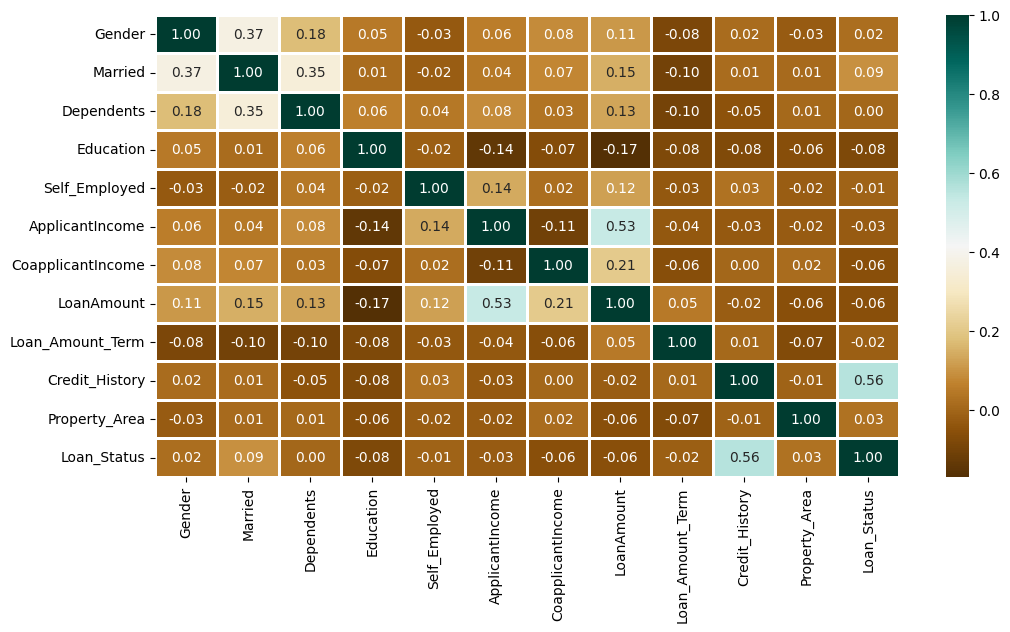

In [8]:
plt.figure(figsize=(12,6))

sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

Using Catplot we visualize the plot for the genders, and Marital Status of the applicant.

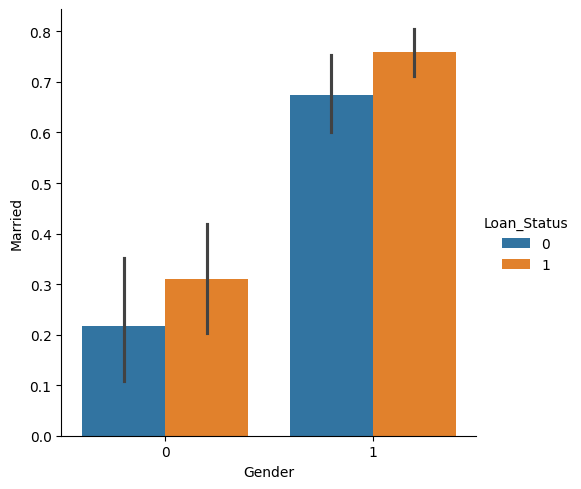

In [9]:
sns.catplot(x="Gender", y="Married",
            hue="Loan_Status",
            kind="bar",
            data=data)

Now we will find out if there is any missing values in the dataset using below code.

In [10]:
for col in data.columns:
  data[col] = data[col].fillna(data[col].mean())

data.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


#Splitting Dataset (Train_test_split)

In [11]:
from sklearn.model_selection import train_test_split

X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.4,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((358, 11), (240, 11), (358,), (240,))

#Model Training and Evaluation
##As this is a classification problem so we will be using these models :

###-->KNeighborsClassifiers
###-->RandomForestClassifiers
###-->Support Vector Classifiers (SVC)
###-->Logistics Regression
##-->To predict the accuracy we will use the accuracy score function from scikit-learn library.

This code snippet continues the model training and evaluation process. It starts by creating instances of the remaining two classifiers:

- svc = SVC(probability=True): Creates a Support Vector Classifier (SVC). The probability=True enables probability estimates for the SVC, which might be needed for certain evaluation metrics like ROC curves.
  lc = LogisticRegression(): Creates a Logistic Regression classifier with default parameters.
- The code then iterates through each of the four classifiers (Random Forest, KNN, SVC, and Logistic Regression) and performs the following steps for each:

- clf.fit(X_train, Y_train): Trains the classifier (clf) using the training data (X_train for features and Y_train for labels).
- Y_pred = clf.predict(X_train): Uses the trained classifier to make predictions on the training data.
- print(...): Calculates and prints the accuracy score of the classifier on the training data.
- The accuracy score is a common metric to evaluate classification models and represents the percentage of correctly classified instances. It's calculated using metrics.accuracy_score(Y_train, Y_pred).

Accuracy score of  KNeighborsClassifier = 78.49162011173185
F1 score of  KNeighborsClassifier = 85.33333333333333
Accuracy score of  RandomForestClassifier = 98.04469273743017
F1 score of  RandomForestClassifier = 98.57433808553971
Accuracy score of  LogisticRegression = 80.44692737430168
F1 score of  LogisticRegression = 87.08487084870849
Accuracy score of  SVC = 68.71508379888269
F1 score of  SVC = 81.33333333333333
Confusion Matrix for KNeighborsClassifier :
 [[ 57  57]
 [ 20 224]]


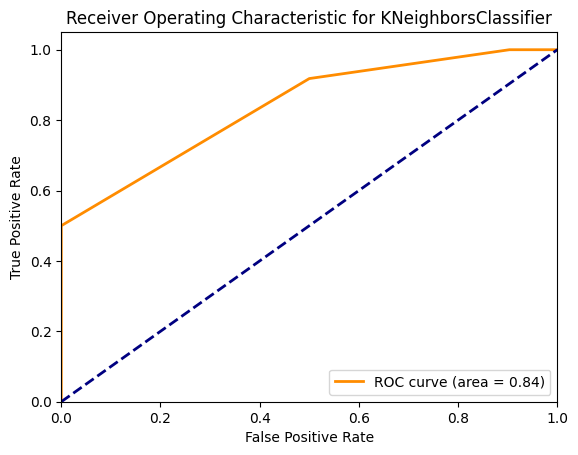

Confusion Matrix for RandomForestClassifier :
 [[109   5]
 [  2 242]]


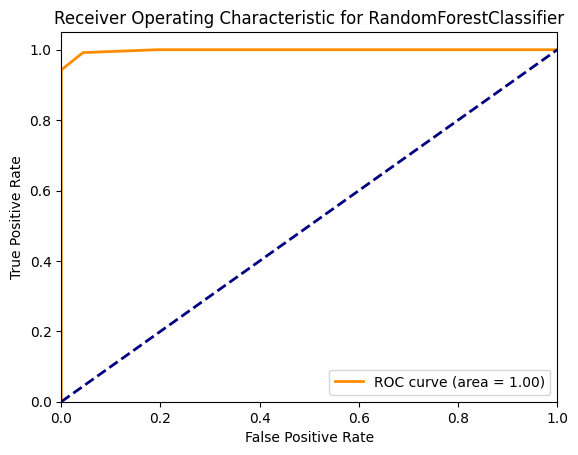

Confusion Matrix for LogisticRegression :
 [[ 52  62]
 [  8 236]]


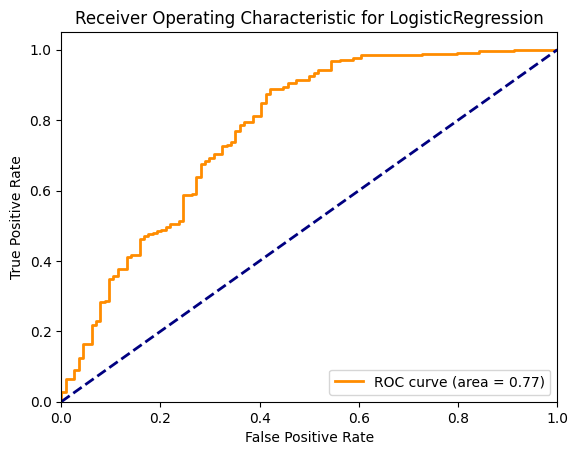

Confusion Matrix for SVC :
 [[  2 112]
 [  0 244]]


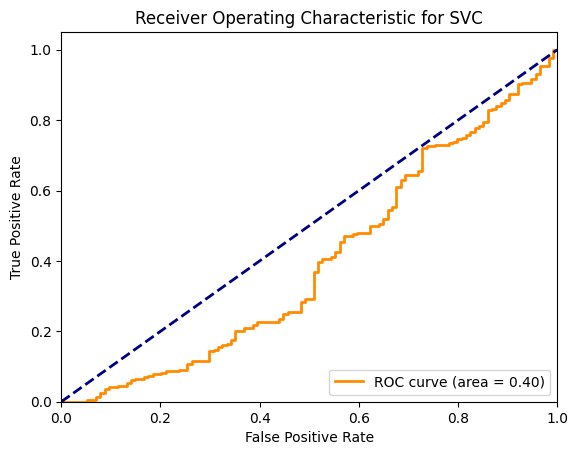

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)
svc = SVC(probability = True)
lc = LogisticRegression()


# svc.fit(X_train, Y_train)
# Y_pred = svc.predict(X_train)
# print("Accuracy score of ",
#           svc.__class__.__name__,
#           "=",100*metrics.accuracy_score(Y_train,
#                                          Y_pred))

# print("F1 score of ",
#            svc.__class__.__name__,
#            "=", 100*metrics.f1_score(Y_train,
#                                      Y_pred))

#making predictions on the training set
for clf in (knn,rfc,lc,svc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(Y_train,
                                         Y_pred))
    print("F1 score of ",
          clf.__class__.__name__,
          "=", 100*metrics.f1_score(Y_train,
                                    Y_pred))

# Confusion Matrix and ROC Curve
# %%
from sklearn.metrics import confusion_matrix, roc_curve, auc

models = [knn,rfc,lc,svc]

for model in models:
  # Get predictions
  Y_pred = model.predict(X_train)

  # Confusion Matrix
  cm = confusion_matrix(Y_train, Y_pred)
  print("Confusion Matrix for", model.__class__.__name__, ":\n", cm)

  # ROC Curve and AUC (for binary classification)
  if hasattr(model, "predict_proba"):
    Y_prob = model.predict_proba(X_train)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_train, Y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for ' + model.__class__.__name__)
    plt.legend(loc="lower right")
    plt.show()
  else:
    print("ROC curve not available for", model.__class__.__name__)

##Prediction on the test data

This code snippet is similar to the previous one, but instead of evaluating the models on the training data, it evaluates them on the test data.

Here's a breakdown of the code:

- for clf in (rfc, knn, svc, lc):: This line starts a loop that iterates through each of the four classifiers (Random Forest, KNN, SVC, and Logistic Regression).

- clf.fit(X_train, Y_train): This line fits (trains) the current classifier (clf) using the training data (X_train for features and Y_train for labels).

- Y_pred = clf.predict(X_test): This line uses the trained classifier to make predictions on the test data (X_test).

- print(...): This line calculates and prints the accuracy score of the classifier on the test data. The accuracy score represents the percentage of correctly classified instances in the test set. It's calculated using metrics.accuracy_score(Y_test, Y_pred).

Accuracy score of  RandomForestClassifier = 82.5
F1 score of  RandomForestClassifier = 87.93103448275862
Accuracy score of  KNeighborsClassifier = 63.74999999999999
F1 score of  KNeighborsClassifier = 75.49295774647888
Accuracy score of  SVC = 69.16666666666667
F1 score of  SVC = 81.77339901477832
Accuracy score of  LogisticRegression = 80.83333333333333
F1 score of  LogisticRegression = 87.36263736263736
Confusion Matrix for RandomForestClassifier :
 [[ 45  28]
 [ 14 153]]


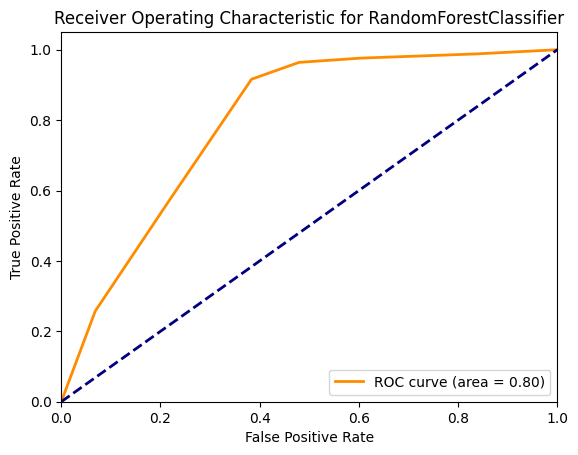

Confusion Matrix for KNeighborsClassifier :
 [[ 19  54]
 [ 33 134]]


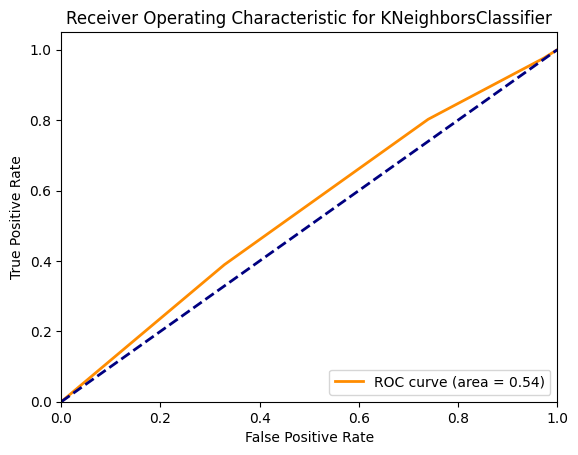

Confusion Matrix for SVC :
 [[  0  73]
 [  1 166]]


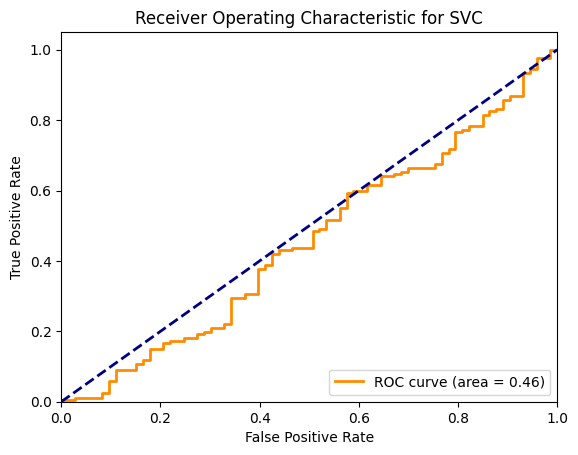

Confusion Matrix for LogisticRegression :
 [[ 35  38]
 [  8 159]]


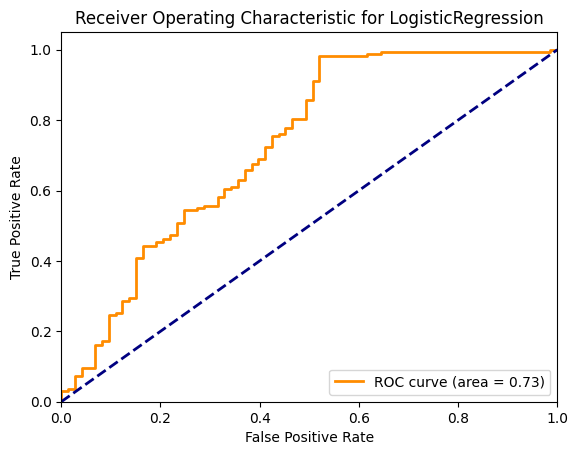

In [16]:
# making predictions on the testing set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy score of ",
          clf.__class__.__name__,"=",
          100*metrics.accuracy_score(Y_test,
                                     Y_pred))
    print("F1 score of ",
          clf.__class__.__name__,
          "=", 100*metrics.f1_score(Y_test,
                                    Y_pred))

# Confusion Matrix and ROC Curve
# %%
from sklearn.metrics import confusion_matrix, roc_curve, auc

models = [rfc, knn, svc, lc]

for model in models:
  # Get predictions
  Y_pred = model.predict(X_test)

  # Confusion Matrix
  cm = confusion_matrix(Y_test, Y_pred)
  print("Confusion Matrix for", model.__class__.__name__, ":\n", cm)

  # ROC Curve and AUC (for binary classification)
  if hasattr(model, "predict_proba"):
    Y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for ' + model.__class__.__name__)
    plt.legend(loc="lower right")
    plt.show()
  else:
    print("ROC curve not available for", model.__class__.__name__)

#1) Problem Identification
#2) Dataset
#3) Solution Algorithm
#4) Confusion Matrix
##*F1*##
##*Accuracy*##
##*ROC*##
###WHY SVC IS NOT OPTIMAL


Full CODE UNDERSTANDING